# Assignment 2 Regression
Name: Dannon Choo <br>
Admin No: p1922503

In [ ]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.2.post1
Numpy version=1.18.5
Pandas version=1.0.5
Matplotlib version=3.2.2
Python version=3.6.9


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

%matplotlib inline

# EDA 

In [ ]:
data = pd.read_csv("kc_house_data.csv")

In [ ]:
data.shape

(21613, 21)

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Correlation between variables and price

In [ ]:
features = data.columns.values.tolist()
features

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
target = features[2]
features.remove('id')
features.remove('price')
features.remove('date')

In [ ]:
print(target)
print(features)

price
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [ ]:
# Finding Correlation of price with features
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [ ]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [ ]:
'sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built'  

('sqft_living',
 'grade',
 'sqft_living15',
 'bathrooms',
 'view',
 'bedrooms',
 'lat',
 'waterfront',
 'floors',
 'yr_renovated',
 'sqft_lot',
 'sqft_lot15',
 'yr_built')

## Graphs

### Heatmap

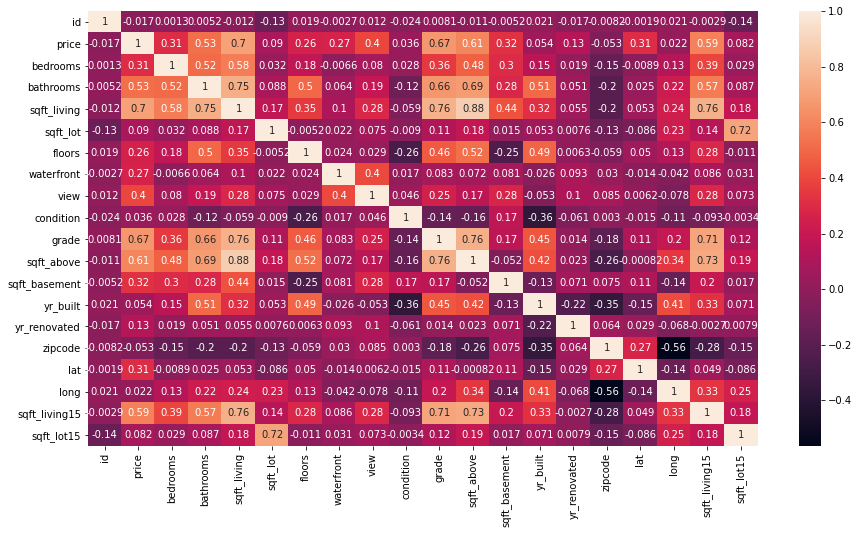

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

### sqft-living vs price Jointplot

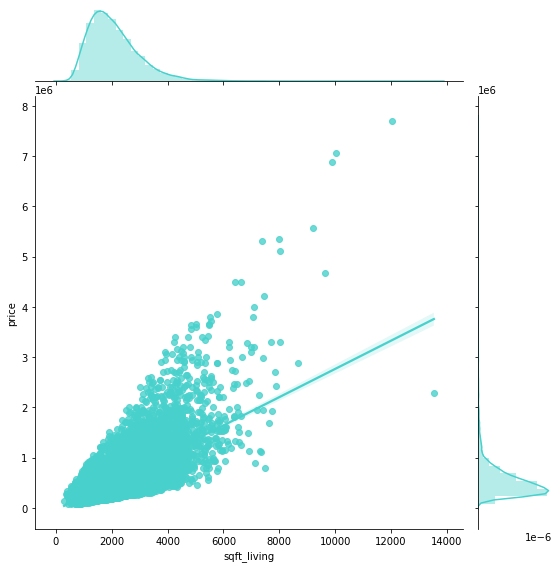

In [ ]:
#sqft-living vs price Jointplot
sns.jointplot(x='sqft_living', y='price', data=data, kind="reg", color='mediumturquoise', height=8)

### sqft-living15 vs price Jointplot

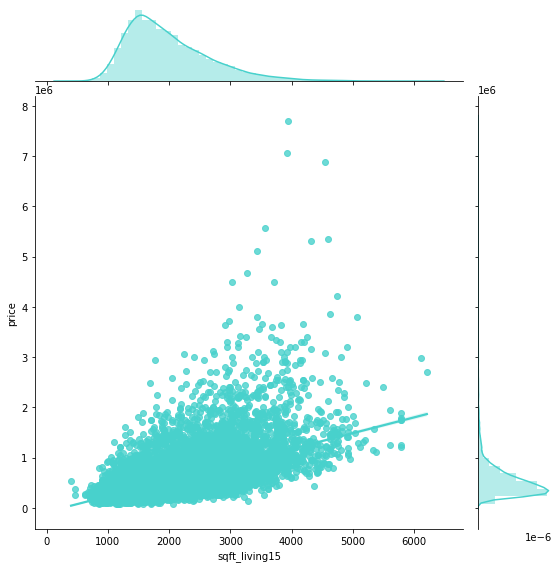

In [ ]:
#sqft_living15 vs price Jointplot
sns.jointplot(x='sqft_living15', y='price', data=data, kind="reg", color='mediumturquoise', height=8)

### grade vs price Violinplot

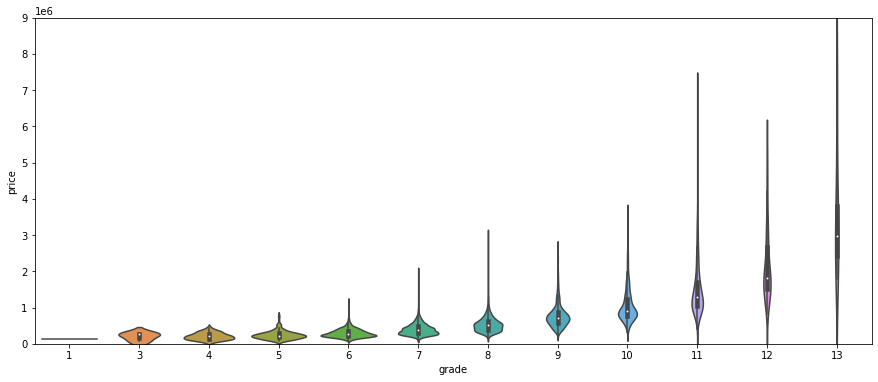

In [ ]:
#grade vs price Violinplot
plt.figure(figsize=(15,6))
fig = sns.violinplot(x='grade', y='price', data=data)
fig.axis(ymin=0, ymax=9000000);

### bathrooms vs price Boxplot

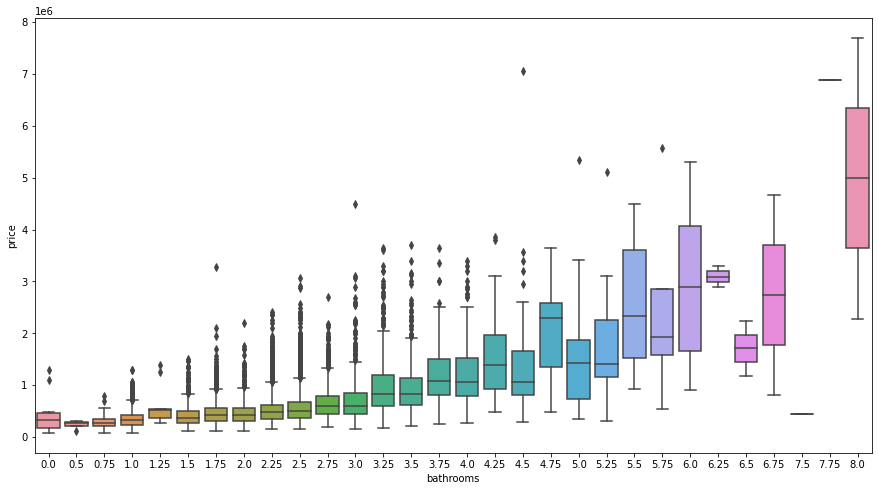

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.boxplot(x='bathrooms', y='price', data=data)

### bedrooms vs price Boxplot

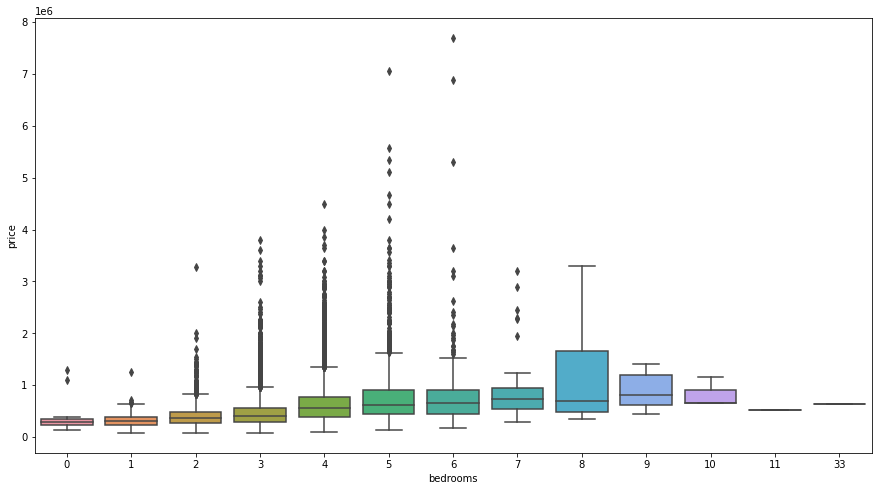

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.boxplot(x='bedrooms', y='price', data=data)

### view vs price Barplot

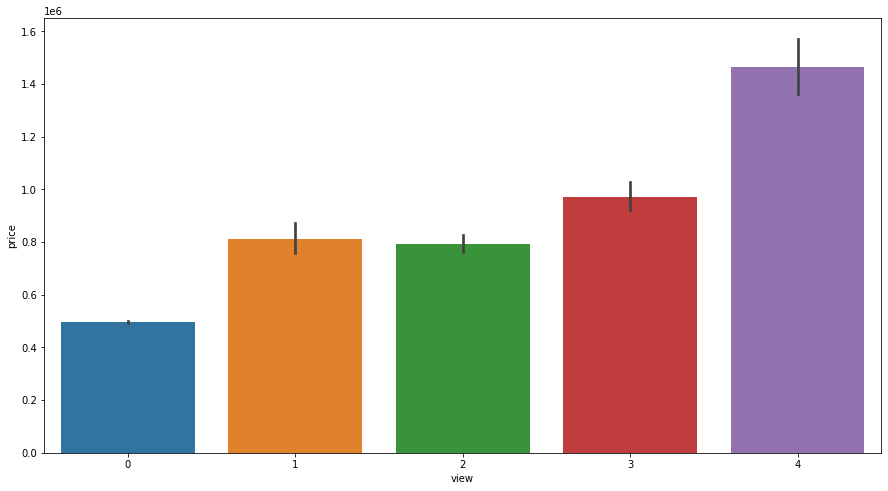

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x='view', y='price', data=data)

# Data Preparation

## Bedrooms

In [ ]:
#drop row with 33 bedrooms
row33Bedrooms = data[data['bedrooms'] == 33]
row33Bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
data.drop(data[data['bedrooms'] == 33].index, inplace=True)

In [ ]:
data.shape

(21612, 21)

## Normalise Data

In [ ]:
data['price'] = np.log(data['price'])

In [ ]:
data['sqft_living'] = np.log(data['sqft_living'])

## feature engineering

### basement

In [ ]:
data.loc[data.sqft_basement > 0, 'sqft_basement'] = 1

In [ ]:
data = data.rename(columns={'sqft_basement':'sqft_basement_encoded'})

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement_encoded,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142166,3,2.00,7.426549,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### renovated

In [ ]:
data.loc[data.yr_renovated > 0, 'yr_renovated'] = 1

In [ ]:
data = data.rename(columns={'yr_renovated':'yr_renovated_encoded'})

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement_encoded,yr_built,yr_renovated_encoded,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142166,3,2.00,7.426549,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Creating Training Data

In [ ]:
#
trainData = data[['sqft_living', 'sqft_basement_encoded', 'long', 'yr_renovated_encoded', 'grade', 'bathrooms', 'view', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_built', 'zipcode', 'condition']]
trainData.head()

,sqft_living,sqft_basement_encoded,long,yr_renovated_encoded,grade,bathrooms,view,bedrooms,lat,waterfront,floors,yr_built,zipcode,condition
0,7.073270,0,-122.257,0,7,1.00,0,3,47.5112,0,1.0,1955,98178,3
1,7.851661,1,-122.319,1,7,2.25,0,3,47.7210,0,2.0,1951,98125,3
2,6.646391,0,-122.233,0,6,1.00,0,2,47.7379,0,1.0,1933,98028,3
3,7.580700,1,-122.393,0,7,3.00,0,4,47.5208,0,1.0,1965,98136,5
4,7.426549,0,-122.045,0,8,2.00,0,3,47.6168,0,1.0,1987,98074,3


In [ ]:
targetData = data['price']
targetData.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

# Split data into train and test

In [ ]:
X = trainData.values
y = targetData.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

# Train models

In [ ]:
seed = 42

## Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
lin_train = linear_reg.score(X_train, y_train)
linear=linear_reg.score(X_test,y_test)
lin_pred = linear_reg.predict(X_test)
exp_lin = explained_variance_score(y_test,lin_pred)
lin_r2=r2_score(y_test,lin_pred)
mse_lin=mean_squared_error(y_test,lin_pred)

## Random Forest Regressor

In [ ]:
rand_regr = RandomForestRegressor(random_state=seed)
rand_regr.fit(X_train, y_train)
rand_train = rand_regr.score(X_train, y_train)
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(y_test,predictions)
rand_r2=r2_score(y_test,predictions)
mse_rand=mean_squared_error(y_test,predictions)

## Gradient Boosting Regressor

In [ ]:
gbst=GradientBoostingRegressor(random_state=seed).fit(X_train, y_train)
grad_train=gbst.score(X_train, y_train)
gradient=gbst.score(X_test,y_test)
pred = gbst.predict(X_test)
exp_est = explained_variance_score(y_test,pred)
gb_r2=r2_score(y_test,pred)
mse_gb=mean_squared_error(y_test,pred)

## Decision Tree Regressor

In [ ]:
decision=DecisionTreeRegressor(random_state=seed)
decision.fit(X_train, y_train)
dec_train=decision.score(X_train, y_train)
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(y_test,decpredict)
dec_r2 =r2_score(y_test,decpredict)
mse_dec=mean_squared_error(y_test,decpredict)

## R2 Scores

In [ ]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
# Show train value
models_result = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Decision Tree','Linear Regression'],
    'Train Score': [grad_train,rand_train,dec_train,lin_train],
    'Score': [gradient,random,decc,linear],
     'Variance Score': [exp_est,exp_rand,exp_dec,exp_lin],
      'R2 Score' : [gb_r2,rand_r2,dec_r2,lin_r2],
      'Mean Squared Error':[mse_gb,mse_rand,mse_dec,mse_lin]})
    
models_result.sort_values(by='Score', ascending=False)

,Model,Train Score,Score,Variance Score,R2 Score,Mean Squared Error
1,Random Forest,0.981785,0.885305,0.885348,0.885305,0.033335
0,Gradient Boosting,0.876612,0.877294,0.877294,0.877294,0.035663
2,Decision Tree,0.997225,0.784799,0.784837,0.784799,0.062546
3,Linear Regression,0.763139,0.776372,0.776418,0.776372,0.064995


# Hyperparameter Tuning

## Random Forest Regressor

In [ ]:
param_grid = {
    'n_estimators': [400,500,600],
    'criterion': ['mse','mae'],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [4,5],
    'min_samples_leaf':[4,5]
}

rf_model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)

grid = GridSearchCV(estimator=rf_model,
                    param_grid=param_grid,
                    n_jobs= 4,
                    cv=kfold)

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.882476 using {'n_estimators': 600, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 4}


In [ ]:
rf_model_ht = RandomForestRegressor(random_state=seed,
                                  n_estimators=600, max_depth=None, min_samples_leaf=4, min_samples_split=5, max_features='auto', criterion='mse')
rf_model_ht.fit(X_train, y_train)

predHT_rf = rf_model_ht.predict(X_test)
r_squared = r2_score(y_test, predHT_rf)
print('r_squared for Random Forest Regressor = ', r_squared)

r_squared for Random Forest Regressor =  0.8857941162798165


## Gradient Boosting Regressor

In [ ]:
param_grid = {
    'n_estimators': [400,500,600,700,800],
    'max_depth': [4,5],
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'min_samples_split': [2,3],
    'learning_rate': [0.1],

}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs= 4,
                    cv=kfold)

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.894058 using {'n_estimators': 400, 'max_depth': 5, 'loss': ls, 'min_samples_split': 2, 'learning_rate': 0.1}


In [ ]:
model = GradientBoostingRegressor(random_state=seed,
                                  n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1)
model.fit(X_train, y_train)

predHT = model.predict(X_test)
r_squared = r2_score(y_test, predHT)
print('r_squared for Gradient Boosting Regressor = ', r_squared)

r_squared for Gradient Boosting Regressor =  0.9001271774421215


## Decision Tree Regressor

In [ ]:
param_grid = {
    'criterion': ["mse", "friedman_mse", "mae"],
    'splitter': ["best", "random"],
    'max_features' : ["auto","sqrt", "log2"],
    'min_samples_split': [80,90,100]
}

dt_model = DecisionTreeRegressor(random_state=seed)
kfold = KFold(n_splits=10, random_state=0)

grid = GridSearchCV(estimator=dt_model,
                    param_grid=param_grid,
                    n_jobs= 4,
                    cv=kfold)

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.834536 using {'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 100, 'splitter': 'best'}


In [ ]:
dt_model_ht = DecisionTreeRegressor(random_state=seed, criterion='mse', max_features='auto', splitter='best', min_samples_split=100)
dt_model_ht.fit(X_train, y_train)

predHT_dt = dt_model_ht.predict(X_test)
r_squared = r2_score(y_test, predHT_dt)
print('r_squared for Decision Tree Regressor = ', r_squared)

r_squared for Decision Tree Regressor =  0.843767355342727


# Ensemble

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('rf', rf_model_ht), ('gb', model), ('dt', dt_model_ht)]
stack = StackingRegressor(estimators=estimators, final_estimator=linear_reg)
stack.fit(X_train, y_train)

pred_stack = stack.predict(X_test)
r_squared_stack = r2_score(y_test, pred_stack)
print('r_squared for StackingRegressor = ', r_squared_stack)

r_squared for StackingRegressor =  0.9012746354024189


# Feature Importance of Best Model

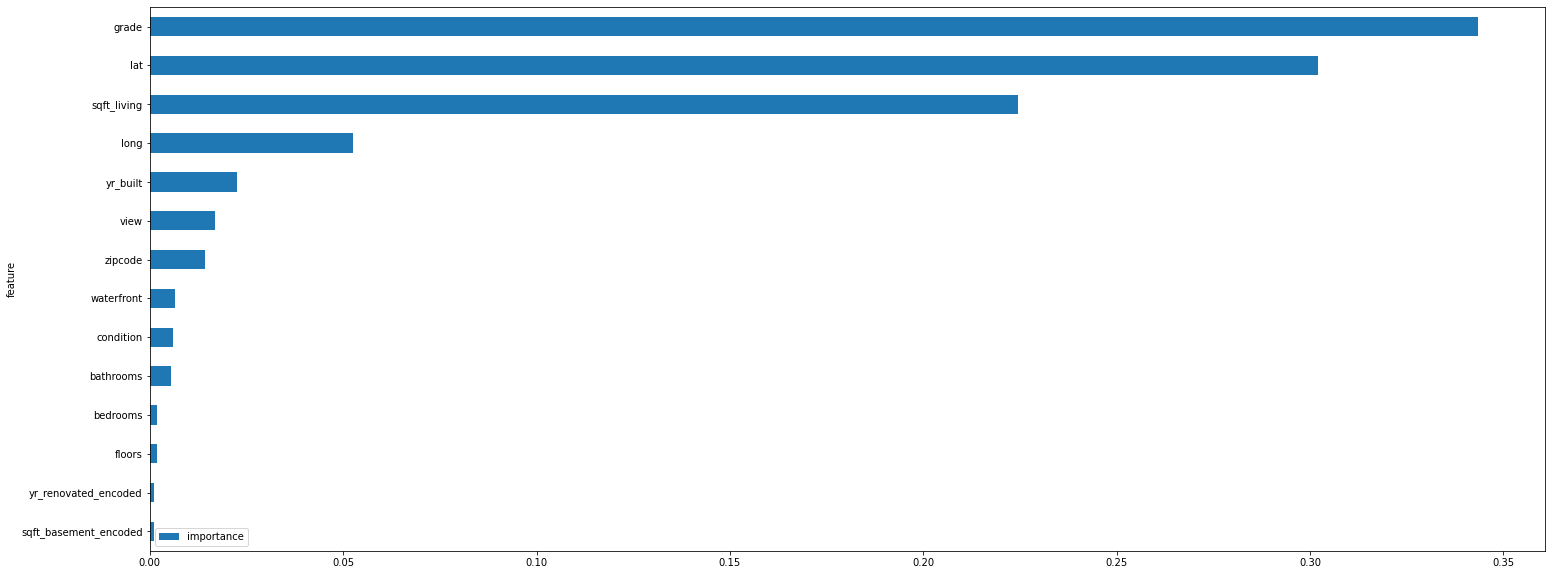

In [ ]:
#find the most important features used for Gradient Boosting Regressor
features = pd.DataFrame()
features['feature'] = trainData.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 10))

# Conclusion

1. How is your prediction task defined? And what is the meaning of the output variable?<br>
<br>
- It is a regression. The output variable is the predicted value of the house price.<br>
<br>

2. How do you represent your data as features?<br>
<br>
- Some columns were feature engineered to give the models better data.<br>
<br>

3. Did you process the features in any way?<br>
<br>
- The sqft_basement and yr_renovated were feature engineered into 0 and 1 (no or yes) values.<br>
<br>

4. Did you bring in any additional sources of data?<br>
<br>
- Some notebooks that had hyperparameter tuning and feature engineering were used as reference.<br>
<br>

5. How did you select which learning algorithms to use?<br>
<br>
- Linear Regression is the most basic and commonly used algorithm for regression.<br>
- Random Forest Regressors usually have high accuracy.<br>
<br>

6. Did you try to tune the hyperparameters of the learning algorithm, and in that case how?<br>
<br>
- GridSearchCV was used to find the best parameters for the different models and K Fold was used.<br>
<br>

7. How do you evaluate the quality of your system?<br>
<br>
- r2_score, explained_variance_score and mean_squared_error were used to find out how well the model did.<br>
<br>

8. Can you say anything about the errors that the system makes?<br>
<br>
The models have a relatively low mse score, which means that they are good models.<br>
<br>

9. Is it possible to say something about which features the model considers important?<br>
<br>
- The Gradient Boosting Regressor considers grade to be the most important feature. This makes sense as having higher quality level of construction and design would require more money, therefore increasing the price of the house.
- sqft_living is also very important as larger houses would usually hace higher prices.
- Zipcode, Latitude and Longtitude are important as houses with similar prices are usually located near each other.

# References

- https://github.com/sid321axn/housing_price_prediction_king_county_USA/blob/master/house_county.ipynb
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://www.silect.is/blog/2019/4/2/random-forest-in-spark-ml
- https://bhishanpdl.github.io/Projects/House_Price_Prediction/c03_regression_modelling_sklearn_methods.html
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://colab.research.google.com/github/dlsun/pods/blob/master/05-Regression-Models/5.7%20Ensemble%20Methods%20for%20Regression.ipynb#scrollTo=Gbqi2fD2raSW
- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/